## Aufgabe 2:

Gibt es „Angstgegner“ einzelner deutscher Spieler, d.h. Paarungen, bei denen der deutsche
Spieler schlechter abschneidet, als es aufgrund der allgemeinen Spielstärke beider Spieler zu
erwarten ist? Gibt es analog „Lieblingsgegner“ einzelner deutscher Spieler?

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
# Read the CSV file and make a copy which only includes matches with at least on germany player
df = pd.read_csv('/home/ronja/documents/studium/bi-project/data/atp_matches_till_2022_preprocessed.csv', delimiter=';', low_memory=False)
df_2 = df.loc[(df['loser_ioc'] == 'GER') | (df['winner_ioc'] == 'GER')].copy()

In [3]:
# Calculate the absolute difference between the two rank points columns
df_2['diff'] = np.abs(df_2['winner_rank_points'] - df_2['loser_rank_points'])
df_2['diff'] = df_2['diff'].dropna()

# Calculate the allowed rank points difference between the two opponents
quantile = df_2['diff'].quantile(q=0.5)

# Select the rows where the difference is less than or equal to the quantile var
df_3 = df_2[df_2['diff'] <= quantile]

#df_3 = df_3.drop(columns=['diff'])

In [4]:
# Angenommen, df ist Ihr DataFrame und 'winner_name' und 'loser_name' sind die Spalten, die Sie interessieren
# und x ist die Mindestanzahl von Begegnungen

# Erstellen Sie ein DataFrame mit allen Matches, bei denen der erste Spieler gegen den zweiten gewonnen hat
wins = pd.DataFrame({'Player1': df_3['winner_name'], 'Player2': df_3['loser_name'], 'Result': 1})

# Erstellen Sie ein DataFrame mit allen Matches, bei denen der erste Spieler gegen den zweiten verloren hat
losses = pd.DataFrame({'Player1': df_3['loser_name'], 'Player2': df_3['winner_name'], 'Result': 0})

# Fügen Sie die Siege und Niederlagen zusammen
all_matches = pd.concat([wins, losses])

# Gruppieren Sie nach 'Player1' und 'Player2' und filtern Sie die Paare, die weniger als x Mal aufgetreten sind
all_matches = all_matches.groupby(['Player1', 'Player2']).filter(lambda group: len(group) >= 8)

# Erstellen Sie eine Pivot-Tabelle mit dem Siegverhältnis für jedes Paar von Spielern
pivot_table = pd.pivot_table(all_matches, values='Result', index=['Player1'], columns=['Player2'])

# Ein Wert von 1 bedeutet, dass der Zeilenspieler(Player1) immer gewonnen hat und ein Wert von 0,5 bedeutet, dass sie die Hälfte der Matches gewonnen haben.

<Axes: xlabel='Player1'>

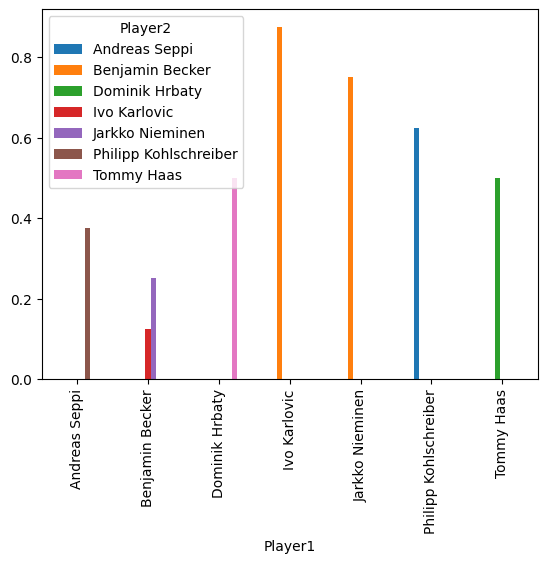

In [6]:
pivot_table.plot.bar()

In [10]:
pivot_table

Player2,Andreas Seppi,Benjamin Becker,Dominik Hrbaty,Ivo Karlovic,Jarkko Nieminen,Philipp Kohlschreiber,Tommy Haas
Player1,,,,,,,
Andreas Seppi,NaN,NaN,NaN,NaN,NaN,0.375,NaN
Benjamin Becker,NaN,NaN,NaN,0.125,0.25,NaN,NaN
Dominik Hrbaty,NaN,NaN,NaN,NaN,NaN,NaN,0.5
Ivo Karlovic,NaN,0.875,NaN,NaN,NaN,NaN,NaN
Jarkko Nieminen,NaN,0.750,NaN,NaN,NaN,NaN,NaN
Philipp Kohlschreiber,0.625,NaN,NaN,NaN,NaN,NaN,NaN
Tommy Haas,NaN,NaN,0.5,NaN,NaN,NaN,NaN
